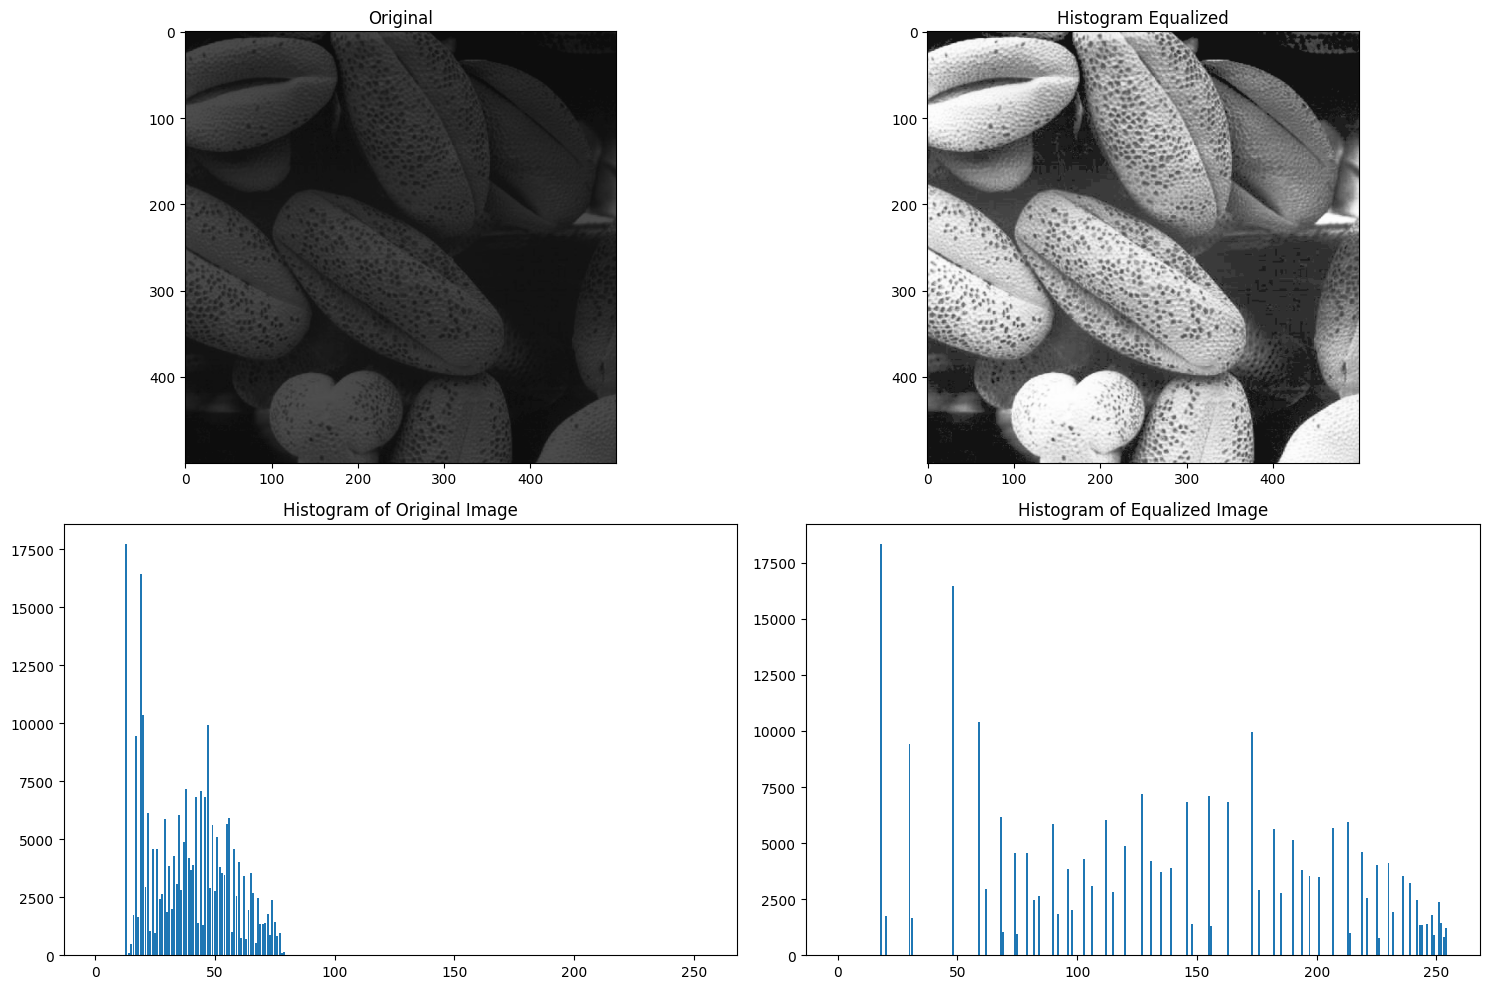

In [19]:
#Question 4 - Histogram Equalization

#intialization and image import
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im = cv.imread('images/shells.tif')
assert im is not None

#calculates the original histogram
h = cv.calcHist([im],[0], None, [256], [0,256])

#calculations for the equalization
c_hist = np.cumsum(h)
pixels = np.sum(h)
equal = c_hist * (255/pixels)
equal = np.clip (equal, 0, 255)
equal_n = equal.astype(np.uint8)

#creates the final image by using the equalized values as a lookup table
im_final = cv.LUT(im, equal_n)

#gets the histogram of the final image
h2 = cv.calcHist([im_final],[0], None, [256],[0,256])

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Displays images
axs[0, 0].imshow(im, vmin=0, vmax=255)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(im_final, vmin=0, vmax=255)
axs[0, 1].set_title('Histogram Equalized')

# Plot histograms 
axs[1, 0].bar(range(256), h.ravel())
axs[1, 0].set_title('Histogram of Original Image')
axs[1, 1].bar(range(256), h2.ravel())
axs[1, 1].set_title('Histogram of Equalized Image')
plt.tight_layout()
plt.show()